<a href="https://colab.research.google.com/github/guilherminog/tcc_timeseries/blob/main/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Carregar o dataset a partir do URL
url = 'https://raw.githubusercontent.com/guilherminog/tcc_timeseries/main/dataset/Walmart.csv'
df = pd.read_csv(url)

# Converter a coluna 'Date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Obter a lista de lojas
stores = df['Store'].unique()

# Criar um dataframe para armazenar as métricas de desempenho
results = pd.DataFrame(columns=['Store', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2'])

# Iterar sobre cada loja
for store in stores:
    print(f'\nProcessando a Loja {store}...')

    # Selecionar dados da loja atual
    df_store = df[df['Store'] == store].copy()

    # Ordenar os dados por data
    df_store = df_store.sort_values('Date')

    # Configurar a coluna 'Date' como índice
    df_store.set_index('Date', inplace=True)

    # Selecionar as colunas relevantes
    endog = df_store['Weekly_Sales']
    exog = df_store[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

    # Aplicar transformação logarítmica
    endog_log = np.log(endog)

    # Dividir os dados em treino e teste
    train_size = int(len(endog_log) * 0.8)
    endog_train, endog_test = endog_log.iloc[:train_size], endog_log.iloc[train_size:]
    exog_train, exog_test = exog.iloc[:train_size], exog.iloc[train_size:]

    # Verificar se há dados suficientes para treino e teste
    if len(endog_train) < 10 or len(endog_test) < 10:
        print(f'A Loja {store} não possui dados suficientes para treinamento e teste. Pulando...')
        continue

    # Definir os parâmetros do modelo
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 52)

    try:
        # Ajustar o modelo
        model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        # Fazer previsões
        predictions_log = model_fit.predict(start=endog_test.index[0], end=endog_test.index[-1], exog=exog_test)

        # Reverter a transformação logarítmica
        predictions = np.exp(predictions_log)
        actual = endog.iloc[train_size:]

        # Calcular as métricas de erro
        mse = np.mean((predictions - actual) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(predictions - actual))
        mape = np.mean(np.abs((actual - predictions) / actual)) * 100

        # Calcular R²
        r2 = r2_score(actual, predictions)

        # Criar um DataFrame com os resultados da loja atual
        new_row = pd.DataFrame({
            'Store': [store],
            'MSE': [mse],
            'RMSE': [rmse],
            'MAE': [mae],
            'MAPE': [mape],
            'R2': [r2]
        })

        # Concatenar o novo DataFrame ao DataFrame de resultados
        results = pd.concat([results, new_row], ignore_index=True)

        print(f'Loja {store}: MAPE={mape:.2f}%, R²={r2:.4f}')

    except Exception as e:
        print(f'Erro ao processar a Loja {store}: {e}')
        continue

# Exibir os resultados finais
print('\nResultados Finais:')
print(results)


Processando a Loja 1...
Loja 1: MAPE=5.46%, R²=-0.5427

Processando a Loja 2...
Loja 2: MAPE=2.79%, R²=0.1451

Processando a Loja 3...
Loja 3: MAPE=6.68%, R²=-2.6204

Processando a Loja 4...
Loja 4: MAPE=5.05%, R²=-4.6630

Processando a Loja 5...
Loja 5: MAPE=5.46%, R²=-0.6410

Processando a Loja 6...
Loja 6: MAPE=10.82%, R²=-2.0386

Processando a Loja 7...
Loja 7: MAPE=4.15%, R²=0.8599

Processando a Loja 8...
Loja 8: MAPE=8.36%, R²=-7.8164

Processando a Loja 9...
Loja 9: MAPE=10.44%, R²=-4.9574

Processando a Loja 10...
Loja 10: MAPE=6.49%, R²=-2.6119

Processando a Loja 11...
Loja 11: MAPE=5.73%, R²=-0.6933

Processando a Loja 12...
Loja 12: MAPE=7.41%, R²=-1.3157

Processando a Loja 13...
Loja 13: MAPE=4.93%, R²=-2.3106

Processando a Loja 14...
Loja 14: MAPE=21.00%, R²=-3.9179

Processando a Loja 15...
Loja 15: MAPE=10.15%, R²=-1.2202

Processando a Loja 16...
Loja 16: MAPE=4.67%, R²=0.7114

Processando a Loja 17...
Loja 17: MAPE=7.08%, R²=-0.0111

Processando a Loja 18...
Loja 

Processando a Loja 1...
Processando a Loja 2...
Processando a Loja 3...
Processando a Loja 4...
Processando a Loja 5...
Processando a Loja 6...
Processando a Loja 7...
Processando a Loja 8...
Processando a Loja 9...
Processando a Loja 10...
Processando a Loja 11...
Processando a Loja 12...
Processando a Loja 13...
Processando a Loja 14...
Processando a Loja 15...
Processando a Loja 16...
Processando a Loja 17...
Processando a Loja 18...
Processando a Loja 19...
Processando a Loja 20...
Processando a Loja 21...
Processando a Loja 22...
Processando a Loja 23...
Processando a Loja 24...
Processando a Loja 25...
Processando a Loja 26...
Processando a Loja 27...
Processando a Loja 28...
Processando a Loja 29...
Processando a Loja 30...
Processando a Loja 31...
Processando a Loja 32...
Processando a Loja 33...
Processando a Loja 34...
Processando a Loja 35...
Processando a Loja 36...
Processando a Loja 37...
Processando a Loja 38...
Processando a Loja 39...
Processando a Loja 40...
Processan

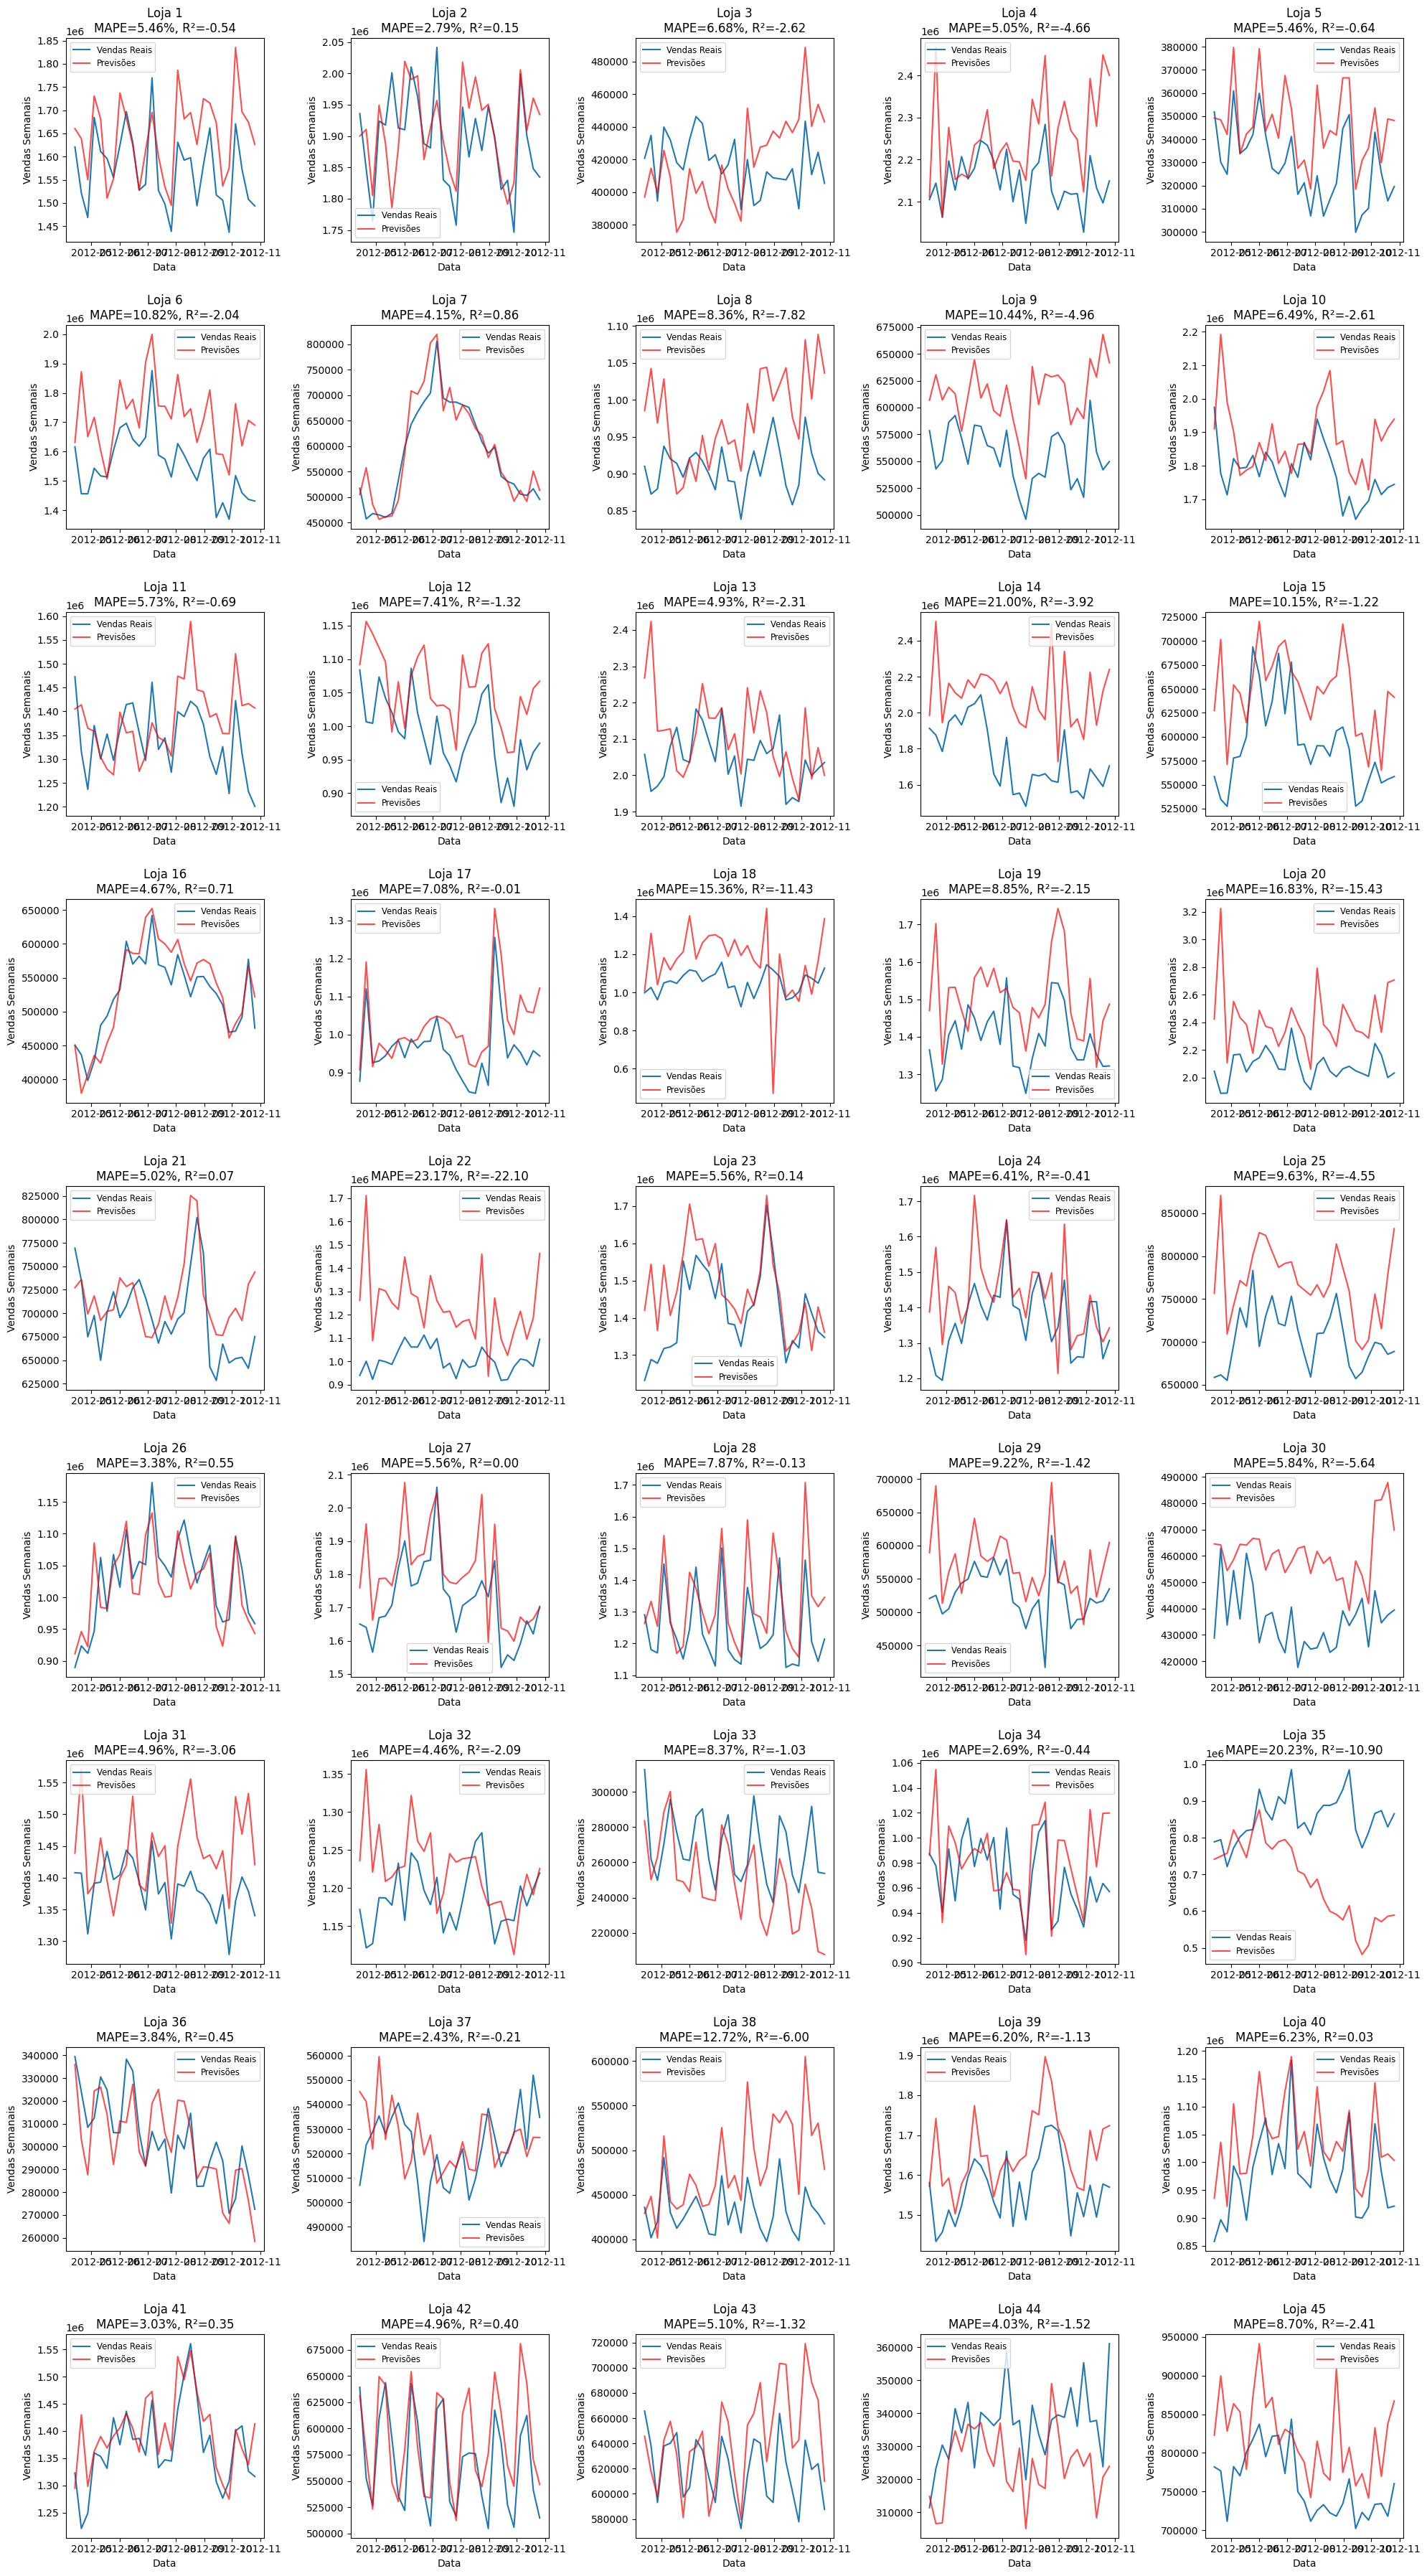

In [10]:
# Definir o número de linhas e colunas para o grid de plots
nrows = 9
ncols = 5

# Criar a figura e os eixos
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 36))  # Ajuste o figsize conforme necessário

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterar sobre cada loja e eixo correspondente
for idx, store in enumerate(stores):
    print(f'Processando a Loja {store}...')

    # Selecionar dados da loja atual
    df_store = df[df['Store'] == store].copy()

    # Ordenar os dados por data
    df_store = df_store.sort_values('Date')

    # Configurar a coluna 'Date' como índice
    df_store.set_index('Date', inplace=True)

    # Selecionar as colunas relevantes
    endog = df_store['Weekly_Sales']
    exog = df_store[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

    # Aplicar transformação logarítmica
    endog_log = np.log(endog)

    # Dividir os dados em treino e teste
    train_size = int(len(endog_log) * 0.8)
    endog_train, endog_test = endog_log.iloc[:train_size], endog_log.iloc[train_size:]
    exog_train, exog_test = exog.iloc[:train_size], exog.iloc[train_size:]

    # Verificar se há dados suficientes para treino e teste
    if len(endog_train) < 10 or len(endog_test) < 10:
        print(f'A Loja {store} não possui dados suficientes para treinamento e teste. Pulando...')
        continue

    # Definir os parâmetros do modelo
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 52)

    try:
        # Ajustar o modelo
        model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        # Fazer previsões
        predictions_log = model_fit.predict(start=endog_test.index[0], end=endog_test.index[-1], exog=exog_test)

        # Reverter a transformação logarítmica
        predictions = np.exp(predictions_log)
        actual = endog.iloc[train_size:]

        # Calcular as métricas de erro
        mse = np.mean((predictions - actual) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(predictions - actual))
        mape = np.mean(np.abs((actual - predictions) / actual)) * 100

        # Calcular R²
        r2 = r2_score(actual, predictions)

        # Plotar no subplot correspondente
        ax = axes[idx]
        ax.plot(actual.index, actual, label='Vendas Reais')
        ax.plot(predictions.index, predictions, label='Previsões', color='red', alpha=0.7)
        ax.set_title(f'Loja {store}\nMAPE={mape:.2f}%, R²={r2:.2f}')
        ax.set_xlabel('Data')
        ax.set_ylabel('Vendas Semanais')
        ax.legend(fontsize='small')

    except Exception as e:
        print(f'Erro ao processar a Loja {store}: {e}')
        continue

# Remover subplots extras se houver
for i in range(idx+1, nrows*ncols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
